Lab01
=====

###  Context
#### Machine Learning Review
   + Clustering
   + Regression
   + Classification
   + Ensemble

# 머신러닝 기초 리뷰
간단하게 지난 데이터 분석 기초 수업에서 배웠던 기초 머신러닝 알고리즘들의 사용법을 살펴보고 심화 내용을 시작하도록 하겠습니다.<br>

## 1) Clustering
클러스터링은 비지도학습의 대표적인 알고리즘으로 '비슷한 데이터는 모여있을것이다' 라는 관점으로 데이터를 군집화합니다.<br>

1. k-means Clustering - k개의 중심점을 기준으로 각 데이터마다 가장 가까운 중심점으로 할당하고, 생성된 군집의 중심점으로 새로운 중심점을 결정하는 알고리즘
2. Hierarchical Clustering - n개의 클러스터를 형성하고 가장 가까운 데이터끼리 군집을 형성(Bottom-Up)하는 알고리즘

## 2) Regression
회귀는 추정하고자 하는 라벨이 연속 데이터인 경우 사용하는 알고리즘으로 잔차의 제곱(분산)을 최소화 하는 회귀선을 찾는 알고리즘입니다.<br>

1. Simple Linear Regression - 데이터 변수의 분포가 직선이고, 1개의 독립 변수에 대한 선형 회귀
2. Multiple Linear Regression - 데이터 변수의 분포가 직선이고, 2개 이상의 독립 변수에 대한 선형 회귀
3. Polynomial Regression - 데이터 변수의 분포가 곡선인 선형 회귀

## 3) Classification
추정하고자 하는 라벨이 범주형 데이터인 경우 사용하는 알고리즘입니다. 모델마다 서로 다른 기준으로 분류 모델을 형성하는 알고리즘입니다.<br>

1. k-NN - k-means와 혼동될 수 있는 분류 모델입니다. 새로운 데이터가 투입되었을 때 그 데이터를 기준으로 k개의 이웃을 찾아 가장 많은 라벨을 선택합니다.
2. Decision Tree - 데이터의 정보량을 최대화하는 방향으로 Greedy하게 분기합니다. 최적해를 찾지 못할 수 있습니다.
3. Logistic Regression - 선형 회귀의 종속 변수를 odd로 표현하여 이진 분류를 가능하게한 모델입니다.


## 4) Ensemble Learning
앙상블 기법은 여러개의 단일 모델을 학습하여 하나의 모델로 작동하게 하는 방법입니다.<br>



### Bagging, Boosting
동일한 알고리즘을 사용하여 여러개의 단일 모델을 통해 하나의 모델을 만드는 방법

1. Bagging - 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계(Aggregating) 하는 방법입니다.
2. Boosting - 이전 학습시에 에러를 일으킨 데이터에 더 큰 중점을 두고 다음 학습을 진행하는 방법입니다.

<img src='./Images/01.JPG'>

### Stacking
서로 다른 알고리즘을 사용하여 여러개의 단일 모델을 통해 하나의 모델을 만드는 방법.<br>

"Two heads are better than one” 이라는 아이디어에서 출발합니다.
Stacking은 서로 다른 모델들을 조합해서 최고의 성능을 내는 모델을 생성합니다. <br> 
여기에서 사용되는 모델은 SVM, RandomForest, KNN 등 다양한 알고리즘을 사용할 수 있습니다. <br>
이러한 조합을 통해 서로의 장점은 취하고 약점을 보완할 수 있게 되는 것 입니다.

직관적인 이해 위한 예시로는 업무 능력이 '중'인 4명과 '상'인 1명이 있는 경우<br>
어떤 프로젝트를 '상' 1명이 하는 것보다 '중'인 4명이 같이 할 때 더 좋은 성과가 나오는 것을 생각하시면 쉽습니다.


앙상블 모델은 단일 모델보다 더욱 좋은 성능을 내며 이는 모델들의 다양성 측면 떄문에 성능이 높아진다고 합니다. <br>



#### 투표 기반 분류기(Voting Classifier)
학습 단계에서 여러개의 머신러닝 알고리즘 모델을 학습시킨 후 이러한 모델들을 이용해 새로운 데이터에 대해 각 모델의 예측값을 가지고 다수결 투표를 통해 최종 클래스를 예측하는 방법입니다. 이러한 분류기를 직접 투표(hard voting) 분류기라고 합니다.
<img src='./Images/02.JPG'>

## Moons 데이터셋에 앙상블 학습 적용하기

위에서 살펴본 투표 분류기를 Scikit-Learn의 VotingClassifier를 이용해 예제 데이터셋인 moons데이터 셋에 적용해보겠습니다.<br>
moons 데이터셋은 Scikit-Learn에서 제공하는 반달 모양의 데이터셋입니다.
<img src='./Images/03.JPG' style="height: 400px">
 

In [1]:
from os.path import join
import pandas as pd


df = pd.read_csv(join('data','moons_data.csv'))
df.head()

,x1,x2,y
0,0.831039,-0.258749,1
1,1.185064,0.920387,0
2,1.164022,-0.455526,1
3,-0.023656,1.086288,0
4,0.480503,1.509424,0


In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

X = df[["x1","x2"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)])

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [3]:
import warnings
warnings.filterwarnings("ignore")

from os.path import join

import time
import random
import numpy as np
import pandas as pd

# 차원 축소 모델
from sklearn.decomposition import PCA

# 군집화 모델
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

# 분류 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# 앙상블 모델
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

datapath = join('data', join('wine', 'wine.txt'))
labelpath = join('data', join('wine', 'wine_attributes.txt'))

columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')

## 1. 데이터 살펴보기
이번 장에서 우리가 사용할 데이터는 178개의 행과 14개의 열로 이루어진 와인 데이터 입니다. <br>
와인 데이터가 가진 컬럼에 대해 간단히 살펴 보겠습니다.<br>
와인 데이터는 13개의 컬럼을 가지고 있으며, 3개의 등급으로 나누어진 데이터셋 입니다.<br>
해당 데이터셋은 등급 컬럼을 이용해 분류에 사용할 수도 있고, 클러스터링, 회귀, 차원축소 등 여러가지 머신러닝 기법에 사용될 수 있습니다.<br>
### Feature Description 
1. Alcohol : 알콜 도수.
2. Malic acid : 와인 특유의 신맛을 나타내는 성분.
3. Ash : 영양학에서, 음식물 속에 들어 있는 무기물 또는 그것의 전체 분량에 대한 비율을 이르는 말.
4. Alcalinity of ash : 무기물의 염기성 정도.
5. Magnesium : 마그네슘 함량.
6. Total phenols : 와인에 들어있는 페놀의 전체 양.
7. Flavonoids :  레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분들 플라보노이드 라고 한다. 떫은 맛을 내는 탄닌이 플라보노이드에 속한다.
8. Nonflavanoid phenols : 90% 성분을 제외한 10%의 페놀 성분들.
9. Proanthocyanins : 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.
10. Color intensity	: 색의 진한 정도.
11. Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도. Edge 라고도 한다.
12. OD280/OD315 of diluted wines
13. Proline : 와인의 아미노산 성분 중 가장 많은 양을 차지함.

<br>데이터를 살펴보기 쉽게 pandas DataFrame으로 읽습니다.

In [4]:
data = pd.read_csv(datapath, names = columns)

DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [5]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


라벨 변수를 따로 저장하고 데이터에서 제거합니다.<br>
del DataFrame['컬럼이름']으로 제거할 수 있습니다.

In [6]:
label = data['Class']
del data['Class']

## 2. 간단한 전처리와 준비
wine 데이터는 13개의 컬럼을 가지고 있고, 하나의 데이터(행)는 13개의 차원으로 이루어진 벡터라고 볼 수 있습니다. <br>
13차원은 우리 눈으로 볼 수 있도록 표현하기 어려우므로 PCA 차원축소를 통해 차원을 줄이겠습니다.<br>
또한, 각 변수들의 값의 범위를 min-max 정규화를 통해 조정해주겠습니다.

In [7]:
for dim in data.columns:
        data[dim] -= np.min(data[dim])
        data[dim] /= np.max(data[dim])

In [8]:
# 클러스터에서는 시각화를 위해 2차원으로 차원을 축소합니다.
pca = PCA(n_components=2)

x = pca.fit_transform(data)

## 3. Clustering
k-means, hierarchical clustering 알고리즘을 살펴보겠습니다.

In [9]:
# k-means 모델 생성
kmeans_model = KMeans(n_clusters=3)
# hierarchical 모델 생성
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='average')

In [10]:
# 데이터 학습 및 군집화
kmeans_label = kmeans_model.fit_predict(x, label)
hierarchical_label = hierarchical.fit_predict(x, label)

#### 3_1. k-means 시각화

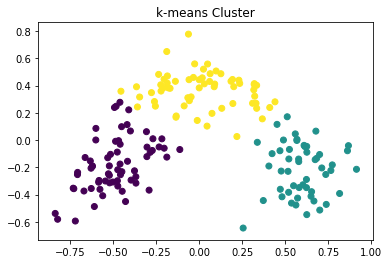

In [11]:
plt.scatter(x[:,0], x[:,1], c=kmeans_label)
plt.title('k-means Cluster')
plt.show()

#### 3_2. hierarchical clustering 시각화

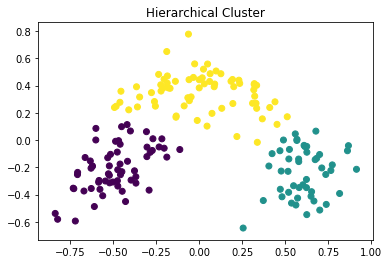

In [12]:
plt.scatter(x[:,0], x[:,1], c=hierarchical_label)
plt.title('Hierarchical Cluster')
plt.show()

## 4. Regression
이번에는 알콜 도수를 기준으로 회귀를 진행해보겠습니다. 회귀에서는 차원 축소를 사용하지 않고 특정 변수를 선택하겠습니다.

In [13]:
# 입력 데이터를 numpy 행렬로 변환합니다.(시각화 오류 방지)
x = data['Proline'].values.reshape((-1, 1))
y = data['Alcohol'].values

In [14]:
# 데이터를 학습 데이터와 검증 데이터로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=2019)

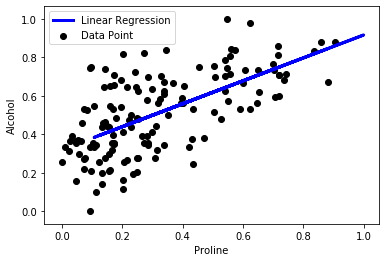

In [15]:
# 데이터 좌표 plot
plt.scatter(x_train, y_train,  color='black', label='Data Point')
model = LinearRegression()
model.fit(X=x_train,y=y_train)

y_pred = model.predict(x_test)

# 회귀 결과 plot
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Linear Regression')

# x축 label
plt.xlabel('Proline')

#y축 label
plt.ylabel('Alcohol')
plt.legend()
plt.show()

In [16]:
# 모델 생성
lr = LinearRegression()
# 훈련 데이터로 모델 학습
lr.fit(x_train, y_train)
# R^2 확인
print('R^2 : {}'.format(lr.score(x_test, y_test)))
# 검증 데이터로 결과 얻기
y_pred = lr.predict(x_test)

R^2 : 0.438721401315867


In [17]:
lr.coef_

array([0.59589925])

## 5. Classification
### 단일 모델
마지막으로 간단하게 분류 모델 사용해보겠습니다. 분류 모델은 차원을 축소하지않고, 데이터 전체를 사용하겠습니다.

In [18]:
# 분류에서는 데이터 전체를 집어넣습니다.
x = data

In [19]:
# 데이터를 학습 데이터와 검증 데이터로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, label,
                                                    test_size=0.33,
                                                    random_state=211)

In [20]:
# 모델을 정의합니다.
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
dt_clf = DecisionTreeClassifier(max_depth=5)
logistic_clf = LogisticRegression()

In [21]:
# 모델을 학습합니다.
knn_clf.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
logistic_clf.fit(x_train, y_train)

# 정확도를 확인해봅니다.
print('knn acc : {:.2f}%'.format(knn_clf.score(x_test, y_test)*100))
print('dt acc : {:.2f}%'.format(dt_clf.score(x_test, y_test)*100))
print('logistic acc : {:.2f}%'.format(logistic_clf.score(x_test, y_test)*100))

knn acc : 96.61%
dt acc : 86.44%
logistic acc : 96.61%


## 6. Ensemble
### 앙상블 모델
상기 3개의 단일 모델을 앙상블 학습을 통해 하나의 모델로 만들어 보겠습니다.

In [22]:
# 앙상블 모델에 넣을 모델들을 보여질 이름과 모델 변수를 쌍으로 리스트로 만듭니다.
clfs = [('k-NN',knn_clf), ('DT', dt_clf), ('LR', logistic_clf)]

# 앙상블 모델에 모델 리스트를 넣어 정의합니다.
ensemble_clf = VotingClassifier(estimators=clfs)

In [23]:
# 모델을 학습합니다.
ensemble_clf.fit(x_train, y_train)

# 정확도를 확인해봅니다.
print('ensemble acc : {:.2f}%'.format(ensemble_clf.score(x_test, y_test)*100))

ensemble acc : 98.31%


기존의 단일 모델의 가장 높은 정확도는 96.61%였지만, 3개의 모델을 앙상블한 모델의 정확도는 98.31%가 나왔습니다.

### Reference

- CrossValidation : https://3months.tistory.com/321